In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [2]:
final_data = pd.read_csv("final_data.csv")
final_data.shape

(209198, 12)

In [3]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209198 entries, 0 to 209197
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     209198 non-null  object 
 1   Year           209198 non-null  int64  
 2   Annual         209198 non-null  float64
 3   Jan-Feb        209198 non-null  float64
 4   Mar-May        209198 non-null  float64
 5   Jun-Sep        209198 non-null  float64
 6   Oct-Dec        209198 non-null  float64
 7   District_Name  209198 non-null  object 
 8   Season         209198 non-null  object 
 9   Crop           209198 non-null  object 
 10  Area           209198 non-null  float64
 11  Production     209198 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 19.2+ MB


In [4]:
final_data['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [5]:


# Condition to filter rows with "Whole Year" season
condition = final_data[final_data['Season'] == 'Whole Year ']
condition.head()

# Divide the 'Production' column by 4 where the condition is met
#df.loc[condition, 'Production'] = df.loc[condition, 'Production'] / 4


,State_Name,Year,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,District_Name,Season,Crop,Area,Production
3,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Sugarcane,1.0,2.0


In [6]:


# Assuming 'final_data' is your DataFrame
final_data['Production'] = final_data.apply(lambda row: row['Production'] / 4 if row['Season'] == 'Whole Year ' else row['Production'], axis=1)


In [7]:
condition1 = final_data[final_data['Season'] == 'Whole Year ']
condition1.head()


,State_Name,Year,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,District_Name,Season,Crop,Area,Production
3,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Banana,176.0,160.25
4,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Cashewnut,720.0,41.25
5,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Coconut,18168.0,16275000.00
6,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Dry ginger,36.0,25.00
7,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,NICOBARS,Whole Year,Sugarcane,1.0,0.50


In [8]:
final_data.drop(columns=['District_Name'], inplace=True)
final_data.head()

,State_Name,Year,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Kharif,Arecanut,1254.0,2000.00
1,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Kharif,Other Kharif pulses,2.0,1.00
2,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Kharif,Rice,102.0,321.00
3,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Whole Year,Banana,176.0,160.25
4,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,Whole Year,Cashewnut,720.0,41.25


In [9]:
# Group by Crop and sum the Area and Production values
grouped_df = final_data.groupby('Crop').agg({'Area': 'sum', 'Production': 'sum'}).reset_index()

# Get top 10 crops by Area
top_10_area = grouped_df.sort_values(by='Area', ascending=False).head(10)

print("Top 10 Crops by Area:")
print(top_10_area)


Top 10 Crops by Area:
                  Crop          Area    Production
94                Rice  6.358849e+08  1.369160e+09
118              Wheat  3.917093e+08  1.117577e+09
32        Cotton(lint)  1.332796e+08  2.593006e+08
104           Soyabean  1.181380e+08  1.173503e+08
6                Bajra  1.132186e+08  1.087258e+08
47               Jowar  1.067495e+08  8.879490e+07
58               Maize  1.038708e+08  2.382539e+08
40                Gram  9.934176e+07  8.173866e+07
42           Groundnut  8.150145e+07  8.657089e+07
91   Rapeseed &Mustard  7.027983e+07  7.616666e+07


In [10]:
# Get top 10 crops by Production
top_10_production = grouped_df.sort_values(by='Production', ascending=False).head(10)

print("Top 10 Crops by Production:")
print(top_10_production)


Top 10 Crops by Production:
             Crop          Area    Production
28       Coconut   2.475523e+07  2.970795e+10
105     Sugarcane  6.536852e+07  2.410665e+09
94           Rice  6.358849e+08  1.369160e+09
118         Wheat  3.917093e+08  1.117577e+09
32   Cotton(lint)  1.332796e+08  2.593006e+08
86         Potato  1.905154e+07  2.557946e+08
58          Maize  1.038708e+08  2.382539e+08
48           Jute  1.200843e+07  1.532656e+08
104      Soyabean  1.181380e+08  1.173503e+08
6           Bajra  1.132186e+08  1.087258e+08


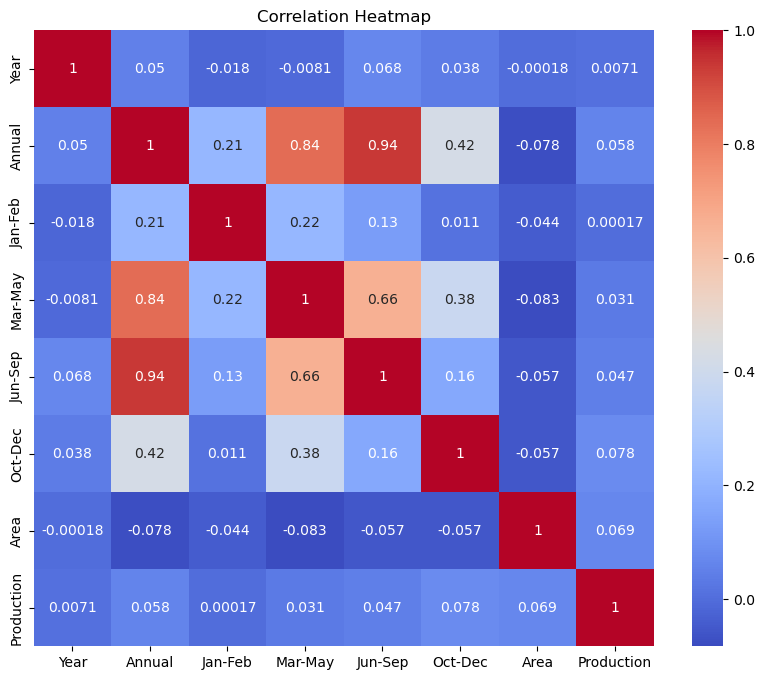

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = final_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

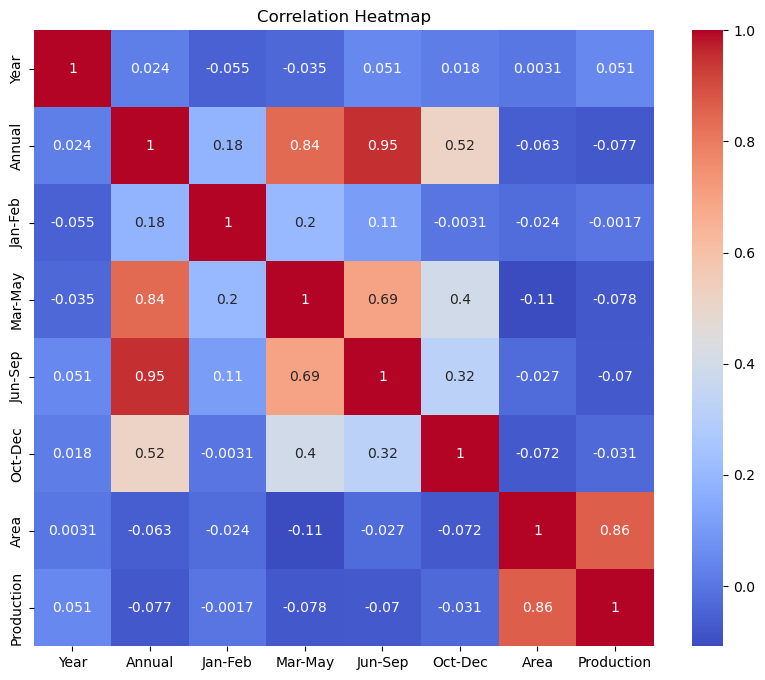

In [12]:
rice = final_data[final_data["Crop"] == "Rice"]
plt.figure(figsize=(10, 8))
correlation_matrix = rice.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

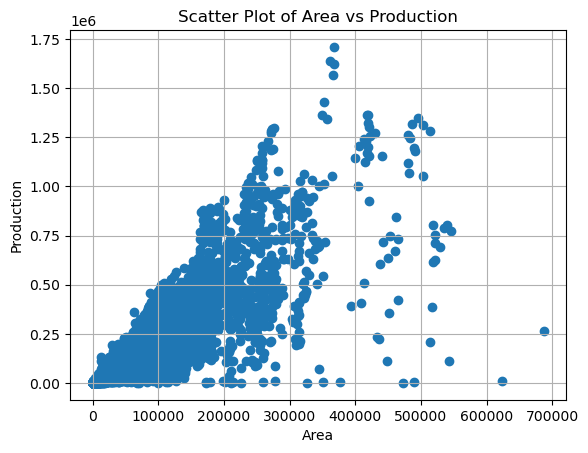

In [13]:
plt.scatter(rice['Area'], rice['Production'])
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Scatter Plot of Area vs Production')
plt.grid(True)
plt.show()

In [14]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12814 entries, 2 to 209196
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State_Name  12814 non-null  object 
 1   Year        12814 non-null  int64  
 2   Annual      12814 non-null  float64
 3   Jan-Feb     12814 non-null  float64
 4   Mar-May     12814 non-null  float64
 5   Jun-Sep     12814 non-null  float64
 6   Oct-Dec     12814 non-null  float64
 7   Season      12814 non-null  object 
 8   Crop        12814 non-null  object 
 9   Area        12814 non-null  float64
 10  Production  12814 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [15]:
# Assuming final_data is your DataFrame
final_data['Season'] = LabelEncoder().fit_transform(final_data['Season'])


In [16]:
final_data.head()

,State_Name,Year,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,1,Arecanut,1254.0,2000.00
1,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,1,Other Kharif pulses,2.0,1.00
2,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,1,Rice,102.0,321.00
3,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,4,Banana,176.0,160.25
4,Andaman and Nicobar Islands,2000,2763.2,112.0,812.2,1244.2,594.7,4,Cashewnut,720.0,41.25


In [17]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Reshape the 'State_Name' column to a 2D array
state_names = final_data['State_Name'].values.reshape(-1, 1)

# Fit and transform the encoder on the reshaped data
encoded_states = encoder.fit_transform(state_names)

# Get the feature names after encoding
encoded_state_columns = encoder.get_feature_names(['State_Name'])

# Create a DataFrame from the encoded data
encoded_data = pd.DataFrame(encoded_states, columns=encoded_state_columns)

# Concatenate the encoded data with the original DataFrame
final_encoded_data = pd.concat([final_data, encoded_data], axis=1)

# Display the first few rows of the final encoded DataFrame
print(final_encoded_data.head())

                    State_Name  Year  Annual  Jan-Feb  Mar-May  Jun-Sep  \
0  Andaman and Nicobar Islands  2000  2763.2    112.0    812.2   1244.2   
1  Andaman and Nicobar Islands  2000  2763.2    112.0    812.2   1244.2   
2  Andaman and Nicobar Islands  2000  2763.2    112.0    812.2   1244.2   
3  Andaman and Nicobar Islands  2000  2763.2    112.0    812.2   1244.2   
4  Andaman and Nicobar Islands  2000  2763.2    112.0    812.2   1244.2   

   Oct-Dec  Season                 Crop    Area  ...  State_Name_Puducherry  \
0    594.7       1             Arecanut  1254.0  ...                    0.0   
1    594.7       1  Other Kharif pulses     2.0  ...                    0.0   
2    594.7       1                 Rice   102.0  ...                    0.0   
3    594.7       4               Banana   176.0  ...                    0.0   
4    594.7       4            Cashewnut   720.0  ...                    0.0   

   State_Name_Punjab  State_Name_Rajasthan  State_Name_Sikkim  \
0        

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
final_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209198 entries, 0 to 209197
Data columns (total 43 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   State_Name                         209198 non-null  object 
 1   Year                               209198 non-null  int64  
 2   Annual                             209198 non-null  float64
 3   Jan-Feb                            209198 non-null  float64
 4   Mar-May                            209198 non-null  float64
 5   Jun-Sep                            209198 non-null  float64
 6   Oct-Dec                            209198 non-null  float64
 7   Season                             209198 non-null  int32  
 8   Crop                               209198 non-null  object 
 9   Area                               209198 non-null  float64
 10  Production                         209198 non-null  float64
 11  State_Name_Andhra Pradesh          2091

In [19]:
rice1 = final_encoded_data[final_encoded_data["Crop"] == "Rice"]

In [20]:
X = rice1.drop(columns=['Production','Crop'])

# Create y with only 'Production' column
y = rice1['Production']

abc = X[X['State_Name'] == 'Jharkhand']
abc.head()


,State_Name,Year,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Season,Area,State_Name_Andhra Pradesh,...,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal
64545,Jharkhand,2002,1034.9,14.4,60.9,902.5,57.1,5,31891.35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64551,Jharkhand,2002,1034.9,14.4,60.9,902.5,57.1,5,27827.15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64553,Jharkhand,2002,1034.9,14.4,60.9,902.5,57.1,0,1955.12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64555,Jharkhand,2002,1034.9,14.4,60.9,902.5,57.1,5,65362.28,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64558,Jharkhand,2002,1034.9,14.4,60.9,902.5,57.1,5,21245.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X = rice1.drop(columns=['State_Name','Production','Crop']).values

# Create y with only 'Production' column
y = rice1['Production'].values


In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## LinearRegression

In [23]:
# Creating Multiple Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating the r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")



Mean Squared Error: 5548726865.862289
R-squared: 0.82


## RandomForestRegressor 

In [24]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_regressor.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Calculating the r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1982898773.751304
R-squared: 0.94


Mean Squared Error: 6161030123.52662
R-squared: 0.80


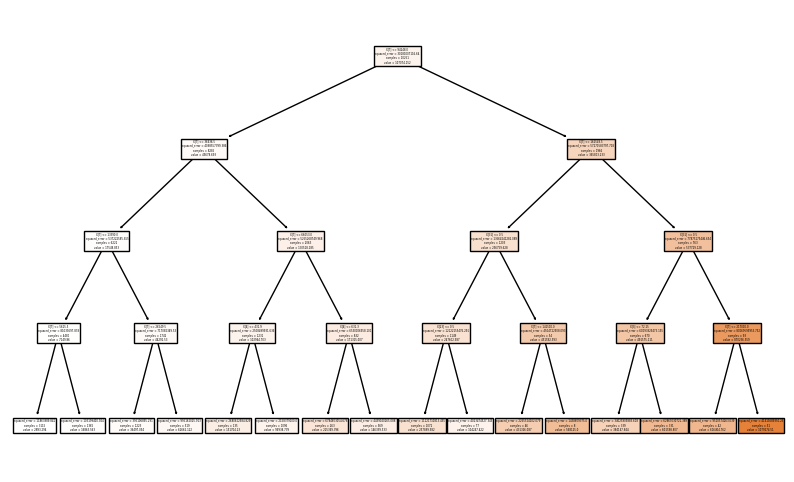

In [25]:
# Creating Decision tree regression model
dt_model = DecisionTreeRegressor(random_state=42,max_depth = 4)
dt_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating the r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


plt.figure(figsize=(10, 6))
plot_tree(dt_model, filled=True)
plt.show()